<center><h1>ML01: Projet Titanic</h1></center>

## Introduction

Le naufrage du RMS Titanic demeure l'une des catastrophes les plus tragiques de l'histoire. Le 15 avril 1912, lors de son voyage inaugural, le Titanic a sombré après avoir heurté un iceberg, entraînant la perte de 1502 vies parmi les 2224 passagers et membres d'équipage à bord. Cette tragédie a profondément choqué le monde entier et a conduit à des améliorations significatives des normes de sécurité maritime.

L'une des raisons principales pour lesquelles le nombre de victimes a été si élevé réside dans le manque de canots de sauvetage disponibles pour les passagers et l'équipage. Bien que la survie lors du naufrage ait été en partie due à la chance, certaines catégories de personnes ont eu une probabilité plus élevée de survie, notamment les femmes, les enfants et les passagers de la classe supérieure.

Notre objectif est de développer un modèle prédictif pour identifier les passagers ayant survécu à cette tragédie, en se basant sur divers facteurs et caractéristiques des individus.

<!-- Colocar uma imgaem de um link do titanico centralizada -->

<center> 
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg" width="500" height="500" />
</center>



| Variable  | Description                                    |
|-----------|------------------------------------------------|
| survival  | Survival (0 = No; 1 = Yes)                       |
| pclass    | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)      |
| name      | Name                                             |
| sex       | Sex                                              |
| age       | Age                                              |
| sibsp     | Number of Siblings/Spouses Aboard                |
| parch     | Number of Parents/Children Aboard                |
| ticket    | Ticket Number                                    |
| fare      | Passenger Fare                                   |
| cabin     | Cabin                                            |
| embarked  | Port of Embarkation   (C = Cherbourg; Q = Queenstown; S = Southampton)|


**NOTE EXPLICATIVE**

Pclass est une approximation du statut socio-économique (SSE).
 1er ~ supérieur ; 2ème ~ moyen ; 3ème ~ inférieur

L'âge est en années et est fractionnaire si l'âge est inférieur à un.
Si l'âge est estimé, il se présente sous la forme xx.5.

En ce qui concerne les variables de relations familiales (c.-à-d. sibsp et parch):certaines relations ont été ignorées.Par exemple, les autres membres de la famille exclus de cette étude sont les cousins,
neveux/nièces, tantes/oncles et beaux-parents.  Certains enfants ont voyagé
ont voyagé uniquement avec une nounou, donc parch=0 pour eux.  De même, certains
ont voyagé avec des amis très proches ou des voisins dans un village, mais les définitions ne permettent pas d'établir de telles relation.
Donc les définitions utilisées pour sibsp et parch sont les suivantes:

* Frère ou sœur :  Frère, sœur, demi-frère ou demi-sœur d'un passager à bord du Titanic.
* Conjoint :   Mari ou femme du passager à bord du Titanic (les maîtresses et les fiancés sont ignorés).

* Parent :   Mère ou père du passager à bord du Titanic.

* Enfant : fils, fille, beau-fils ou belle-fille du passager à bord du Titanic.





## Imports des Librairies

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorer warnings
warnings.filterwarnings("ignore")


## Visualisation des données

In [2]:
df_train = pd.read_csv('train_titanic.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Types des données par colonnes**


In [76]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Le type "object" est une chaîne de caractères pour pandas, ce qui pose des problèmes avec les algorithmes du machine learning.  Si nous voulons les utiliser comme caractéristiques, nous devrons les convertir en représentations numériques.

**Informations élémentaires**

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Gestion des Valeurs Manquantes dans notre Ensemble de Données**

Il apparaît que dans notre ensemble de données, les colonnes "Age", "Cabin" et "Embarked" contiennent des valeurs manquantes. La colonne "Cabin" a un grand nombre de valeurs manquantes, ce qui la rend difficile à utiliser de manière significative. Par conséquent, nous envisageons de supprimer complètement cette colonne de notre analyse.

Pour les colonnes "Age" et "Embarked", nous avons une approche différente. Les valeurs manquantes dans la colonne "Age" peuvent être estimées en utilisant des méthodes telles que la moyenne d'âge, la médiane, ou d'autres techniques d'imputation. Cela nous permettra de remplir ces valeurs manquantes avec des estimations raisonnables de l'âge des passagers.

Quant à la colonne "Embarked" (port d'embarquement), nous pouvons remplir les valeurs manquantes en utilisant la valeur la plus courante (le port le plus fréquent) ou en faisant une hypothèse informée basée sur notre connaissance des données.

En résumé, nous prévoyons de supprimer la colonne "Cabin" en raison du grand nombre de valeurs manquantes, et pour les colonnes "Age" et "Embarked", nous utiliserons des techniques d'imputation pour remplir les valeurs manquantes de manière à ce que notre analyse puisse se poursuivre de manière significative.

**Retirer les columns ID (inutiles) (Name, PassengerID, Ticket) 


Generate various descriptive statistics on the DataFrame:

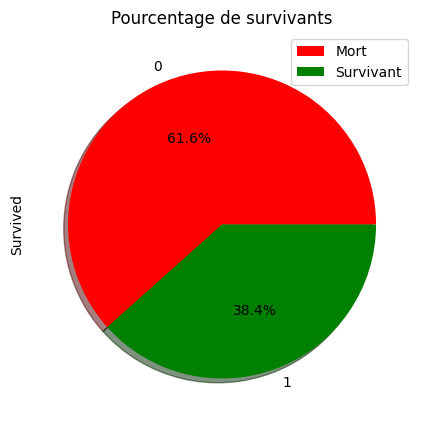

In [16]:

# Change les couleurs du graphique et ajoute un legende et ecrit un texte pour decrire le graphique

# graphique in pizza graphique in palette='hls'
df_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,5),colors=['red','green'])
plt.title('Pourcentage de survivants')
plt.legend(['Mort','Survivant'])

plt.show()




In [15]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


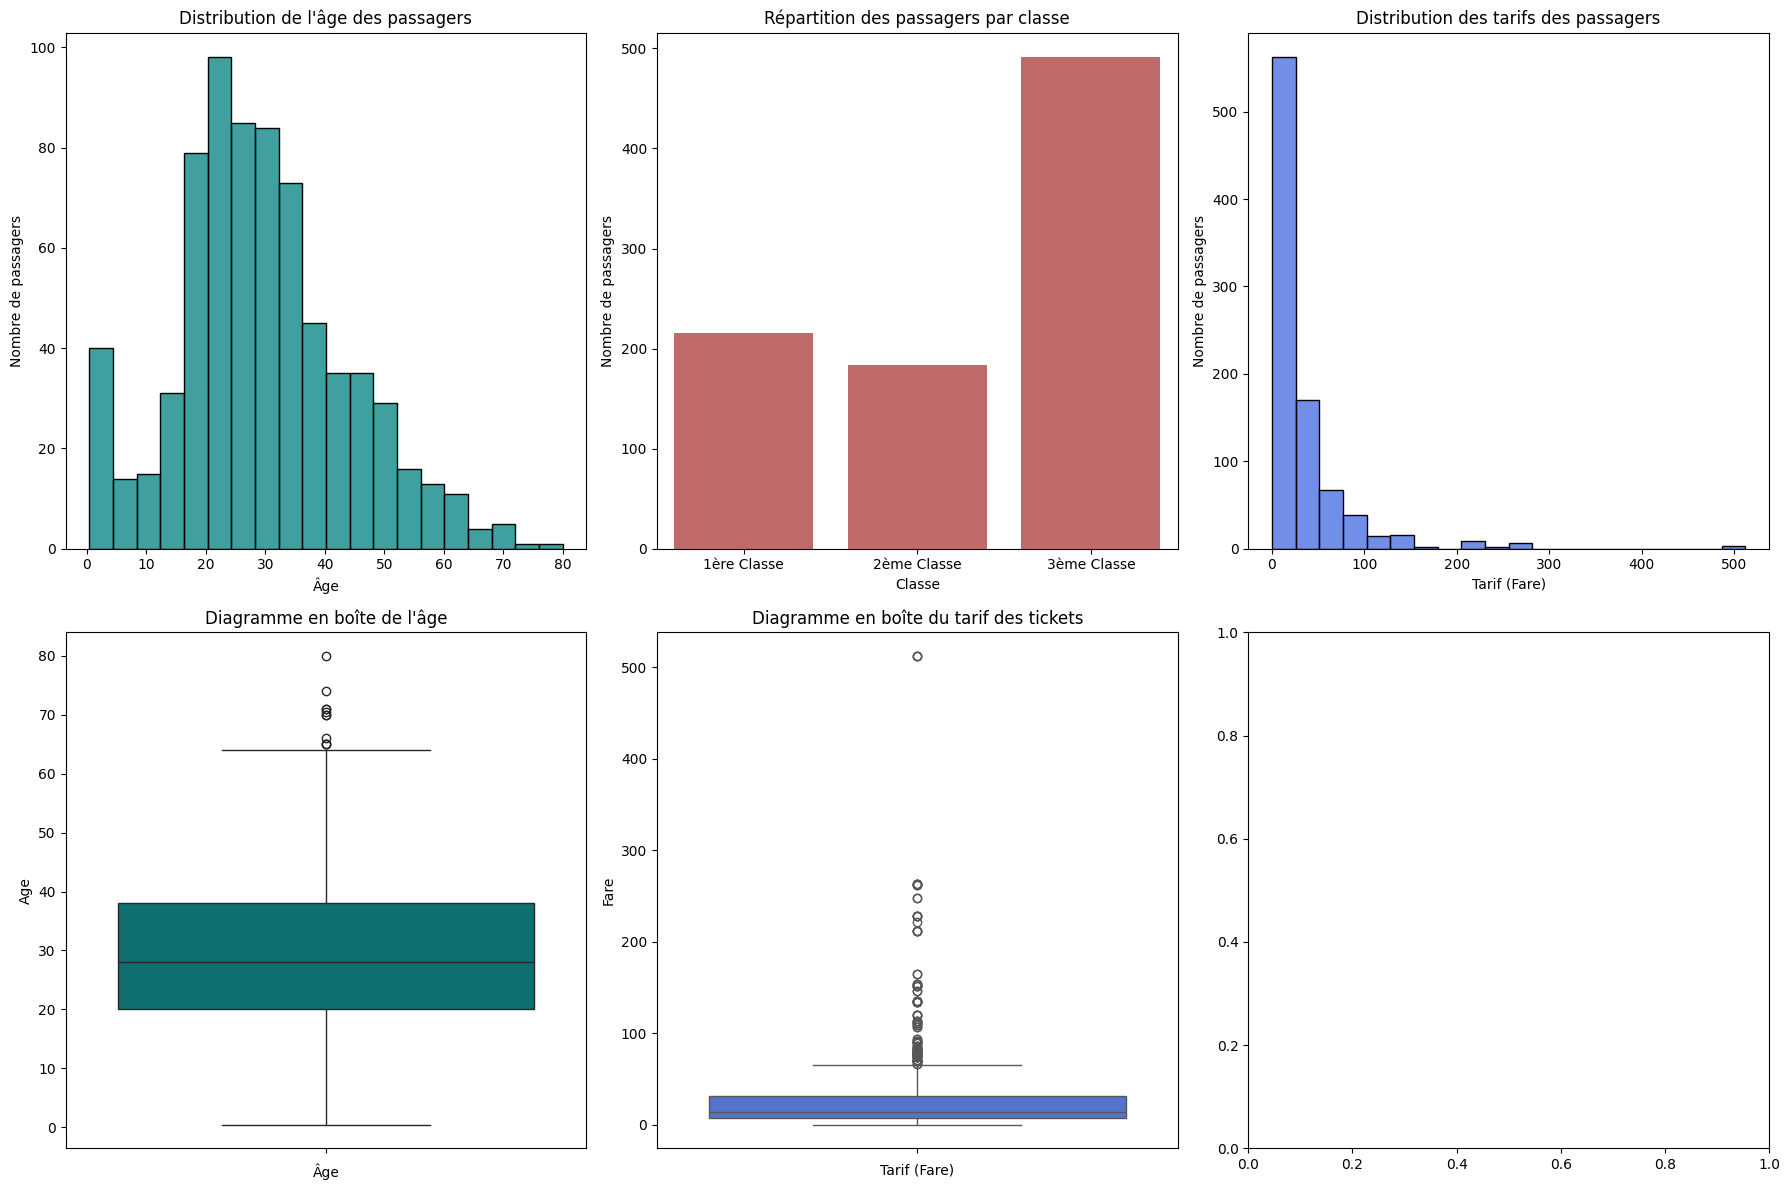

In [20]:
# Suprrime la colonne vide.

# Création d'une figure avec deux rangées de trois sous-graphiques chacune
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Rangée supérieure de graphiques
# Graphique de l'âge
sns.histplot(data=df_train, x='Age', bins=20, color='#008080', ax=axes[0, 0])
axes[0, 0].set_xlabel('Âge')
axes[0, 0].set_ylabel('Nombre de passagers')
axes[0, 0].set_title('Distribution de l\'âge des passagers')

# Graphique de la classe des passagers (Pclass)
class_counts = df_train['Pclass'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, color='#CD5C5C', ax=axes[0, 1])
axes[0, 1].set_xlabel('Classe')
axes[0, 1].set_ylabel('Nombre de passagers')
axes[0, 1].set_title('Répartition des passagers par classe')
axes[0, 1].set_xticklabels(['1ère Classe', '2ème Classe', '3ème Classe'])

# Rangée inférieure de graphiques
# Graphique de fare
sns.histplot(data=df_train, x='Fare', bins=20, color='#4169E1', ax=axes[0, 2])
axes[0, 2].set_xlabel('Tarif (Fare)')
axes[0, 2].set_ylabel('Nombre de passagers')
axes[0, 2].set_title('Distribution des tarifs des passagers')

# Diagramme en boîte de l'âge
sns.boxplot(data=df_train, y='Age', color='#008080', ax=axes[1, 0])
axes[1, 0].set_xlabel('Âge')
axes[1, 0].set_title('Diagramme en boîte de l\'âge')

# Diagramme en boîte de Fare
sns.boxplot(data=df_train, y='Fare', color='#4169E1', ax=axes[1, 1])
axes[1, 1].set_xlabel('Tarif (Fare)')
axes[1, 1].set_title('Diagramme en boîte du tarif des tickets')

plt.tight_layout()
plt.show()


Maintenant que nous avons une idée générale du contenu de l'ensemble de données, nous pouvons approfondir l'aperçu de chaque colonne.  Nous allons effectuer une analyse exploratoire des données et les "nettoyer" afin de définir les caractéristiques que nous utiliserons dans nos algorithmes de machine learning.




Un text pour expliquer

Corrélation entre les variables. 

<Axes: >

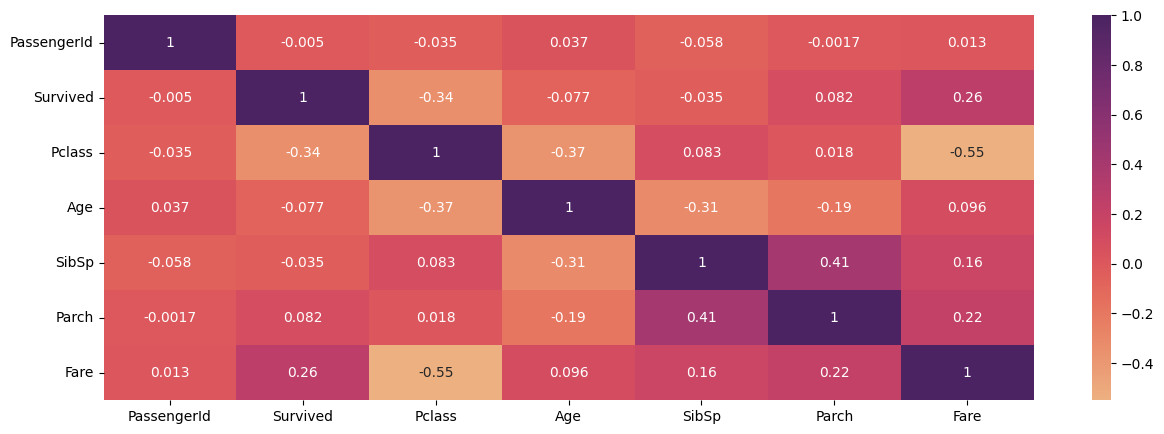

In [48]:
plt.figure(figsize=(15, 5))
custom_palette = sns.color_palette("flare", as_cmap=True)  # Substitua "coolwarm" pela paleta de cores desejada
sns.heatmap(df_train.corr(), annot=True, cmap=custom_palette)

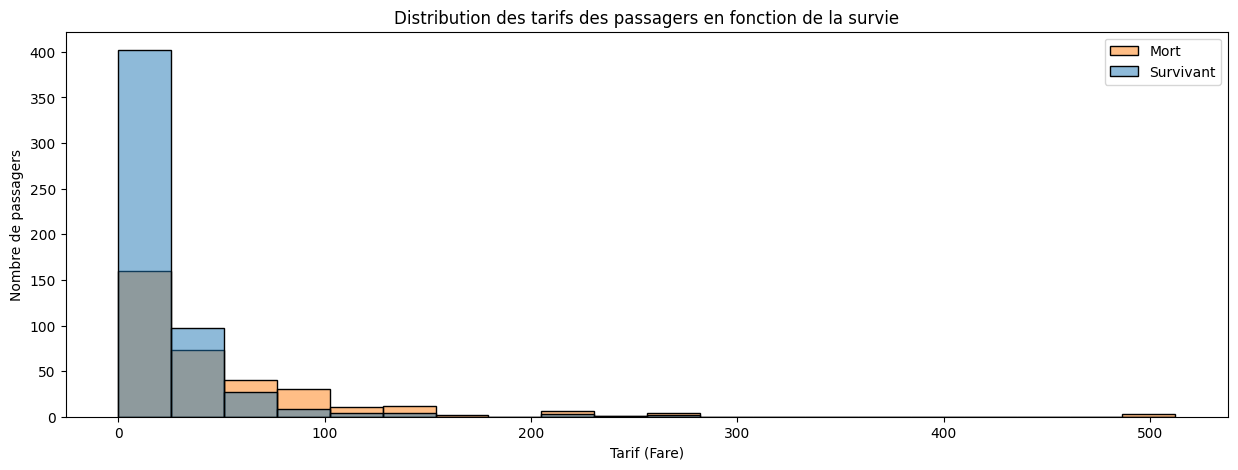

In [37]:
# ANALYSER APRÈS


# Change les couleurs du graphique et ajoute un legende et ecrit un texte pour decrire le graphique

# df_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,5),colors=['red','green'])
# plt.title('Pourcentage de survivants')
# plt.legend(['Mort','Survivant'])

# plt.show()

# graphique in histogram graphique avec la variable survived par chaque classe fare intervalle par rapport a survived
plt.figure(figsize=(15, 5))
sns.histplot(data=df_train, x='Fare', hue='Survived', bins=20)
plt.title('Distribution des tarifs des passagers en fonction de la survie')
plt.xlabel('Tarif (Fare)')
plt.ylabel('Nombre de passagers')
plt.legend(['Mort', 'Survivant'])
plt.show()






# Pre-Processing

In [38]:
# Comment dit avant
df_train = df_train.drop (['Name','Ticket','Cabin','PassengerId'], axis = 1)




# K-Nearest-Neighbours (KNN)

In [92]:
import statistics  as sts

# df_train = df_train.drop (['Name','Ticket','Cabin','PassengerId'], axis = 1)


### Substituição NAs BMI pela mediana
mediana = sts.median(df_train['Age'])
#preenche NAs
df_train['Age'].fillna(mediana, inplace=True)

# ### Substituição NAs BMI pela mediana
# mediana = sts.median(df_train['Embarked'])
# #preenche NAs
# df_train['Embarked'].fillna(mediana, inplace=True)

df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [95]:
from sklearn.preprocessing import LabelEncoder



labelencoder = LabelEncoder()
df_train[["Sex", "Age", "Embarked"]] = df_train[["Sex", "Age", "Embarked"]].apply(labelencoder.fit_transform)

In [96]:

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,28,1,0,7.2500,2
1,1,1,0,51,1,0,71.2833,0
2,1,3,0,34,0,0,7.9250,2
3,1,1,0,47,1,0,53.1000,2
4,0,3,1,47,0,0,8.0500,2


In [99]:
from sklearn.preprocessing import StandardScaler


std=StandardScaler()
columns = ['Age','Fare']
scaled = std.fit_transform(df_train[['Age','Fare']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df_train.drop(columns=columns,axis=1)
df=df.merge(scaled,left_index=True,right_index=True,how="left")

df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,0,3,1,1,0,2,-0.807422,-0.502445
1,1,1,0,1,0,0,0.093656,0.786845
2,1,3,0,0,0,2,-0.572358,-0.488854
3,1,1,0,1,0,2,-0.063053,0.420730
4,0,3,1,0,0,2,-0.063053,-0.486337


In [102]:
X = df.drop(['Survived'], axis=1).values 
y = df['Survived'].values



from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Text(0, 0.5, 'Score')

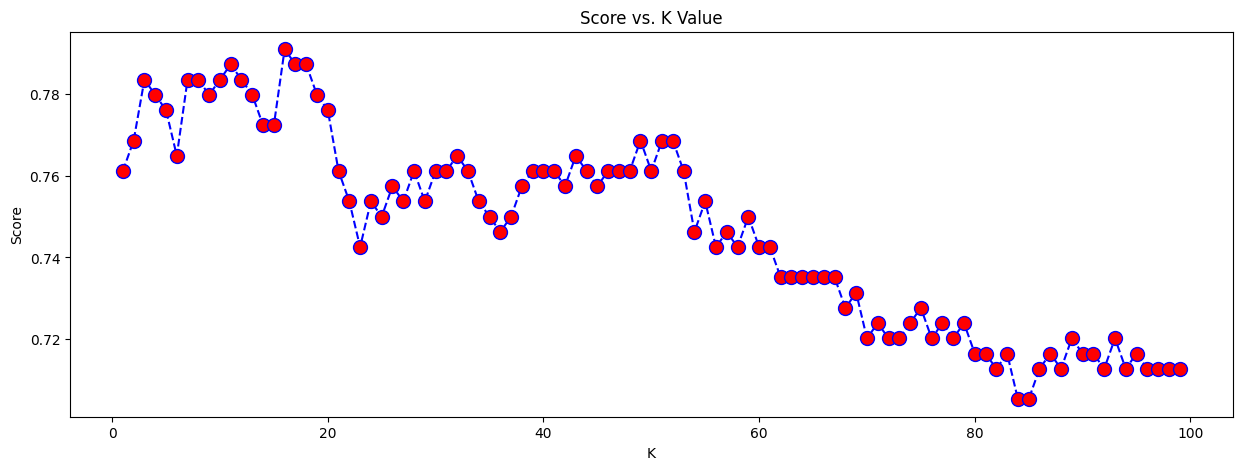

In [112]:
from sklearn.neighbors import KNeighborsClassifier

score = np.array([])
# Create KNN classifier
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    score = np.append(score,knn.score(X_test, y_test))

# Plotando o gráfico de K x Score
plt.figure(figsize=(15, 5))
plt.plot(range(1,100),score,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score')
